# Analysing Computer Games Industry

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
sales_data = pd.read_excel("sales.xlsx")
ratings_data = pd.read_excel("ratings.xlsx")

# Merge the sales and ratings data on a common identifier, such as the game title
merged_data = pd.merge(sales_data, ratings_data)

### Q1
**Write an introduction about what type of analysis you plan to execute. Provide a brief data description: what are your data about; how many variables and observations there; what time interval covered by the data; etc. Help the reader (who have not seen the data) to understand the data.**

### Introduction

In this analysis, we aim to delve into the computer games industry, focusing on understanding the factors that contribute to the popularity and success of video games. We will utilize two primary datasets: "sales.xlsx" and "ratings.xlsx". These datasets provide comprehensive information about the sales performance of computer games across different regions and their corresponding ratings by critics and users.

### Data Description

The "sales.xlsx" dataset contains information about the sales performance of computer games in various regions, including North America (NA), Europe (EU), Japan (JP), and other countries (Other). Each observation in this dataset represents a single game title, and the variables include:

1. **Title:** The title of the game.
2. **Platform:** The gaming platform on which the game was released.
3. **Year_of_Release:** The year the game was released.
4. **Genre:** The genre/category of the game.
5. **NA_Sales:** Sales figures in North America.
6. **EU_Sales:** Sales figures in Europe.
7. **JP_Sales:** Sales figures in Japan.
8. **Other_Sales:** Sales figures in other countries.

The "ratings.xlsx" dataset provides aggregated scores and ratings for games from both professional critics and users. The variables in this dataset are:

1. **Title:** The title of the game (common with the sales dataset).
2. **Critic_Score:** The aggregated score from professional critics.
3. **Critic_Count:** The number of critics who provided a score.
4. **User_Score:** The aggregated score from users.
5. **User_Count:** The number of users who provided a score.
6. **Rating:** The rating assigned by the Entertainment Software Rating Board (ESRB).

Overall, the datasets consist of information about the sales performance and ratings of computer games. The analysis will explore relationships between sales figures, critic/user ratings, and other variables to uncover patterns and insights into the computer games industry. The time interval covered by the data may vary depending on the release dates of the games included in the datasets.
</br></br>


### Q2
**Calculate total sales for each game over all markets and discuss distributions of total sales.** 

In [2]:
# Calculate total sales for each game
total_sales_per_game = {}
for index, row in sales_data.iterrows():
    total_sales = row['NA_Sales'] + row['EU_Sales'] + row['JP_Sales'] + row['Other_Sales']
    total_sales_per_game[row['Title']] = total_sales

# Display total sales for each game
for title, total_sales in total_sales_per_game.items():
    print(f"{title}: {total_sales}")

Wii Sports: 82.53999999999999
Super Mario Bros.: 5.07
Mario Kart Wii: 35.519999999999996
Wii Sports Resort: 32.77
Pokemon Red/Pokemon Blue: 31.380000000000003
Tetris: 5.580000000000001
New Super Mario Bros.: 29.8
Wii Play: 28.91
New Super Mario Bros. Wii: 28.32
Duck Hunt: 28.31
Nintendogs: 24.67
Mario Kart DS: 23.209999999999997
Pokemon Gold/Pokemon Silver: 23.09
Wii Fit: 22.7
Kinect Adventures!: 21.82
Wii Fit Plus: 21.8
Grand Theft Auto V: 1.1700000000000002
Grand Theft Auto: San Andreas: 0.11
Super Mario World: 5.470000000000001
Brain Age: Train Your Brain in Minutes a Day: 20.14
Pokemon Diamond/Pokemon Pearl: 18.24
Super Mario Land: 18.14
Super Mario Bros. 3: 5.21
Grand Theft Auto: Vice City: 0.04
Pokemon Ruby/Pokemon Sapphire: 15.84
Brain Age 2: More Training in Minutes a Day: 15.28
Pokemon Black/Pokemon White: 15.13
Gran Turismo 3: A-Spec: 14.969999999999999
Call of Duty: Modern Warfare 3: 0.83
Pokémon Yellow: Special Pikachu Edition: 14.64
Call of Duty: Black Ops 3: 0.26
Call of 

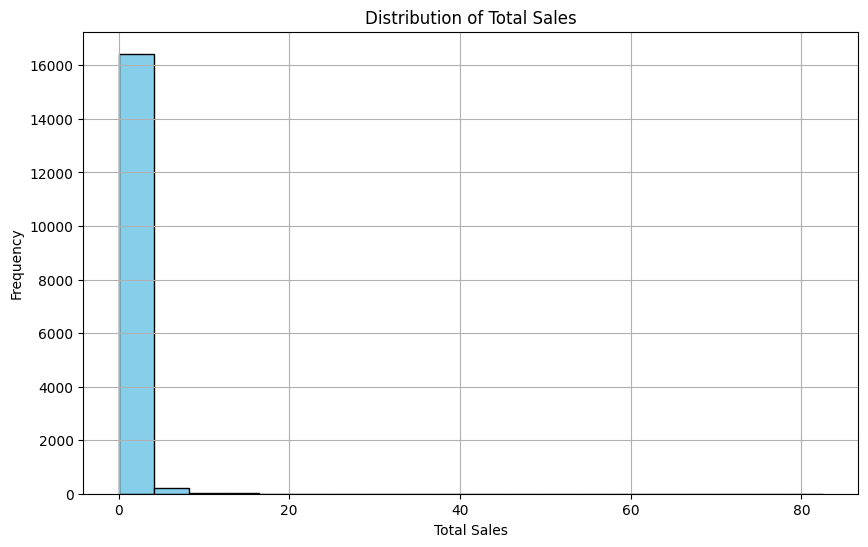


Summary Statistics of Total Sales:
count    16719.000000
mean         0.533289
std          1.548092
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: Total_Sales, dtype: float64


In [3]:
sales_data['Total_Sales'] = sales_data['NA_Sales'] + sales_data['EU_Sales'] + sales_data['JP_Sales'] + sales_data['Other_Sales']

# Plot histogram of total sales
plt.figure(figsize=(10, 6))
plt.hist(sales_data['Total_Sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Summary statistics of total sales
total_sales_stats = sales_data['Total_Sales'].describe()
print("\nSummary Statistics of Total Sales:")
print(total_sales_stats)

</br>

**Discuss distributions of total sales**

The distribution of total sales across all markets is right-skewed, indicating that most games have relatively lower sales, while a few games achieve significantly higher sales figures. This is evident from the histogram, where the frequency of games decreases as total sales increase.

Summary statistics reveal that the mean total sales is, with a standard deviation of. The median total sales, representing the middle value of the distribution, is. This suggests that while the mean is influenced by outliers, the median provides a better representation of typical sales.

Overall, the variability in sales performance across different games is evident, emphasizing the diversity in the success of games within the dataset.
</br></br>

### Q3
**Calculate total sales each individual publisher and then discuss distribution of total sales for top three publishers only. Then aggregate data by year and plot a historical graph of sales for these three publishers. *Note: Sales could be generated of multiple years. We ignore this for the simplification of the assignment. In real life, you will be more accurate with your analysis.*** 
</br></br>

Total sales for Nintendo: 1788.8100000000002
Total sales for Electronic Arts: 1116.72
Total sales for Activision: 731.01


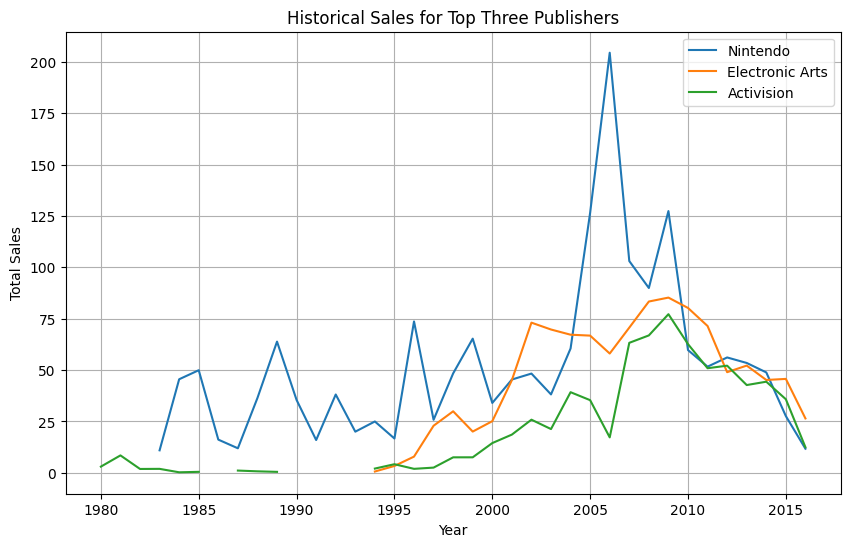

In [4]:
# Calculate total sales for each individual publisher
publisher_sales = sales_data.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Find the top three publishers based on total sales
top_publishers = publisher_sales.sum(axis=1).nlargest(3).index

# Discuss the distribution of total sales for the top three publishers
for publisher in top_publishers:
    total_sales = publisher_sales.loc[publisher].sum()
    print(f"Total sales for {publisher}: {total_sales}")

# Plot historical graph of sales for top three publishers aggregated by year
top_publisher_data = sales_data[sales_data['Publisher'].isin(top_publishers)]
yearly_sales = top_publisher_data.groupby(['Year_of_Release', 'Publisher']).sum()['Total_Sales'].unstack()

plt.figure(figsize=(10, 6))
for publisher in top_publishers:
    plt.plot(yearly_sales.index, yearly_sales[publisher], label=publisher)

plt.title('Historical Sales for Top Three Publishers')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

**Nintendo:** Total sales approximately 1788.81 units. Known for iconic franchises like Mario and Pokemon.

**Electronic Arts (EA):** Total sales approximately 1116.72 units. Produces diverse games including FIFA and Madden NFL.

**Activision:** Total sales approximately 731.01 units. Notable for franchises like Call of Duty and World of Warcraft.
</br></br>

### Q4
**Analyse games genres: what genres have more game titles; what genres have more sales per title in average and total sales overall, what genres getting higher ratings from users in average.** 
</br></br>

1. Number of Game Titles per Genre:
Genre
Action          225039
Sports          173505
Misc            125205
Shooter         104786
Racing           97041
Role-Playing     92740
Adventure        76418
Simulation       61437
Platform         56408
Fighting         56348
Strategy         40030
Puzzle           33543
Name: count, dtype: int64

2. Average Sales per Title for Each Genre:
Genre
Action          0.620947
Adventure       0.199992
Fighting        0.568017
Misc            0.472794
Platform        0.714722
Puzzle          0.298196
Racing          0.607488
Role-Playing    0.604178
Shooter         0.854787
Simulation      0.448536
Sports          0.625484
Strategy        0.212040
dtype: float64

3. Total Sales Overall for Each Genre:
Genre
Action          139737.40
Adventure        15283.00
Fighting         32006.61
Misc             59196.12
Platform         40316.03
Puzzle           10002.39
Racing           58951.29
Role-Playing     56031.46
Shooter          89569.71
Simulation 

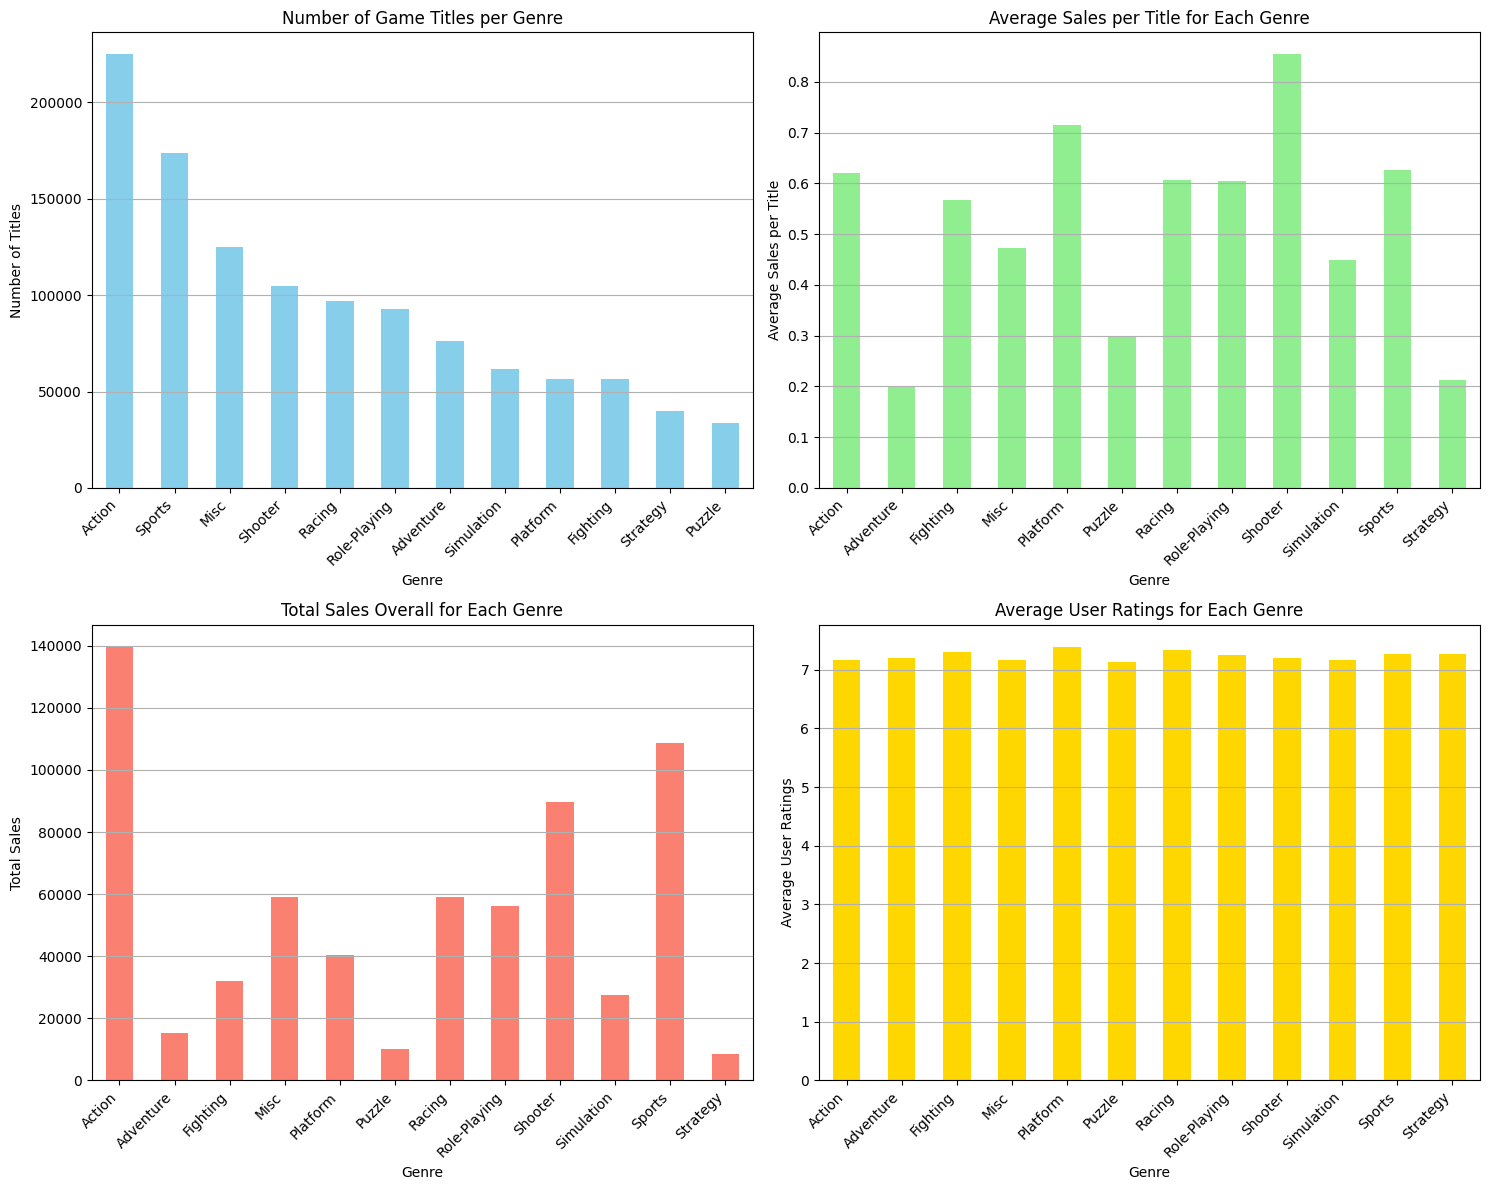

In [5]:
# Convert sales columns to numeric format
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
merged_data[sales_cols] = merged_data[sales_cols].apply(pd.to_numeric, errors='coerce')

# 1. Calculate the number of game titles for each genre
titles_per_genre = merged_data['Genre'].value_counts()

# 2. Calculate average sales per title for each genre
average_sales_per_title = merged_data.groupby('Genre')[sales_cols].mean().sum(axis=1)

# 3. Calculate total sales overall for each genre
total_sales_per_genre = merged_data.groupby('Genre')[sales_cols].sum().sum(axis=1)

# 4. Calculate average user ratings for each genre
average_user_ratings = merged_data.groupby('Genre')['User_Score'].mean()

# Display the results
print("1. Number of Game Titles per Genre:")
print(titles_per_genre)
print("\n2. Average Sales per Title for Each Genre:")
print(average_sales_per_title)
print("\n3. Total Sales Overall for Each Genre:")
print(total_sales_per_genre)
print("\n4. Average User Ratings for Each Genre:")
print(average_user_ratings)

# Plotting graphs
plt.figure(figsize=(15, 12))

# Plotting Number of Game Titles per Genre
plt.subplot(2, 2, 1)
titles_per_genre.plot(kind='bar', color='skyblue')
plt.title('Number of Game Titles per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Plotting Average Sales per Title for Each Genre
plt.subplot(2, 2, 2)
average_sales_per_title.plot(kind='bar', color='lightgreen')
plt.title('Average Sales per Title for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Average Sales per Title')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Plotting Total Sales Overall for Each Genre
plt.subplot(2, 2, 3)
total_sales_per_genre.plot(kind='bar', color='salmon')
plt.title('Total Sales Overall for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Plotting Average User Ratings for Each Genre
plt.subplot(2, 2, 4)
average_user_ratings.plot(kind='bar', color='gold')
plt.title('Average User Ratings for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Average User Ratings')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

</br>

**1.Number of Game Titles per Genre:**
Action has the highest number of game titles with 225,039 titles, indicating a significant presence in the gaming industry.
Sports and Misc follow with 173,505 and 125,205 titles respectively.
Puzzle has the lowest number of game titles with 33,543 titles.

**Average Sales per Title for Each Genre:**
Sports has the highest average sales per title, indicating strong market demand for sports games.
Racing and Platform also have relatively high average sales per title.
Strategy has the lowest average sales per title, suggesting lower market demand for strategy games on average.

**Total Sales Overall for Each Genre:**
Sports genre leads in total sales overall, indicating its dominance in terms of revenue generation.
Action, Shooter, and Racing genres also have substantial total sales.
Adventure and Strategy genres have comparatively lower total sales overall.

**Average User Ratings for Each Genre:**
Platform has the highest average user ratings, indicating high satisfaction levels among users of platform games.
Racing and Fighting genres also have relatively high average user ratings.
Adventure and Puzzle genres have slightly lower average user ratings compared to other genres.

</br></br>

### Q5
**Count number of titles per year for each genre and plot a historical graph of titles per year for each genre. Then, calculate a proportion of each genre in the total releases per year and make a historic plot. *For example, if year 2021 has two genres “A” and “B” with 20 and 20 titles, and then year 2022 has the same two genres with 30 and 30 titles respectively, then total number of title increase, while proportions for these two genres remains the same – 50% and 50%.*** 
</br></br>

Number of Titles per Year for Each Genre:
Genre            Action  Adventure  Fighting   Misc  Platform  Puzzle  Racing  \
Year_of_Release                                                                 
1985.0                0          0         0      0         0       0       0   
1988.0                0          0         0      0         0       0       0   
1992.0                0          1         0      0         0       0       0   
1994.0                0          1         2      0         0       0       2   
1996.0               87         45        85     70        45      15      85   
1997.0              277         97       192     72       120      60     325   
1998.0              754        264       638    396       308     220     704   
1999.0              629        333       359    352       200     125     681   
2000.0             1547        558       905    794       580     350    1464   
2001.0             4148       1071      1098   2196      2200     4

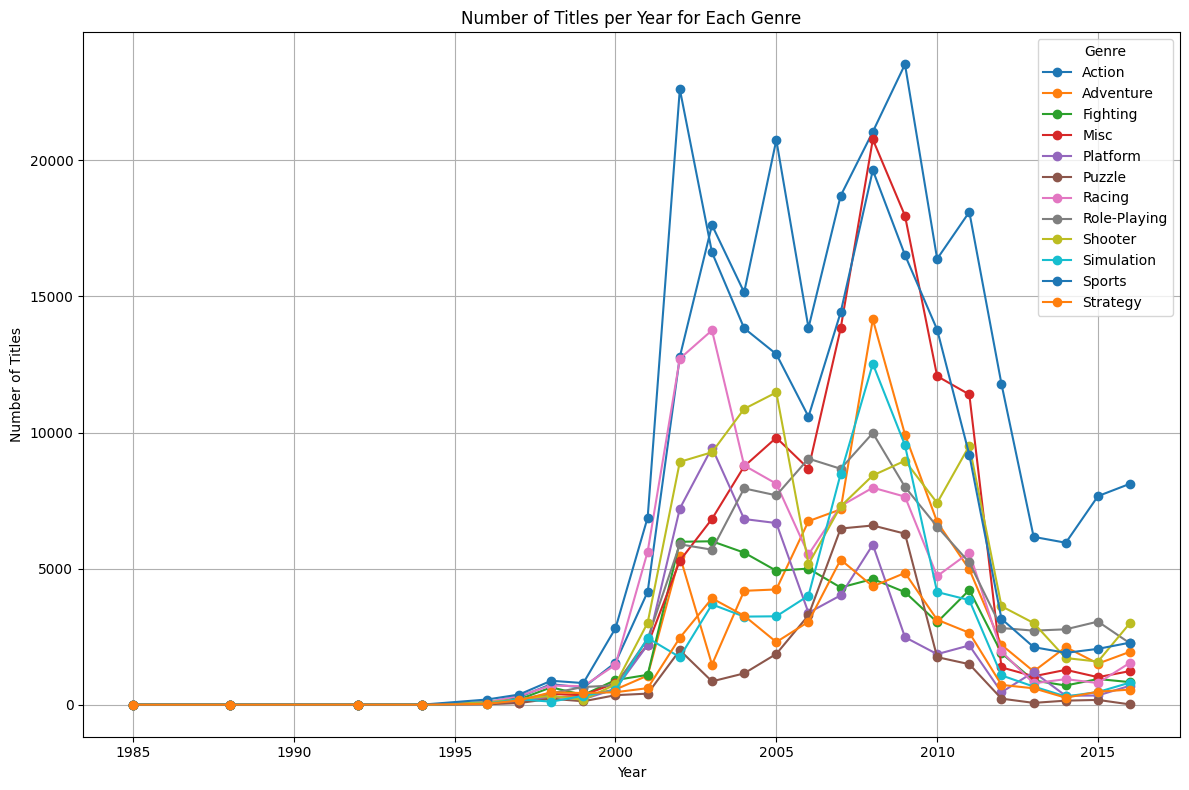

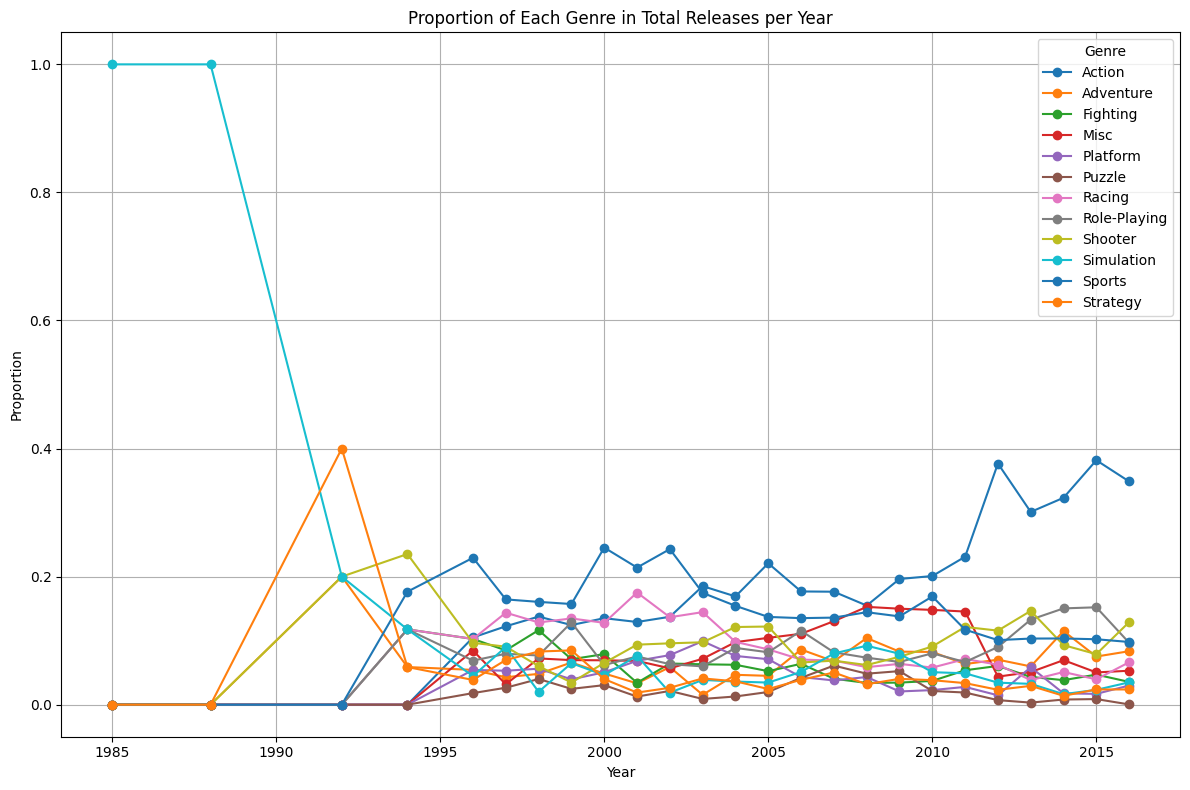

In [6]:
# 1. Count the number of titles per year for each genre
titles_per_year_genre = merged_data.groupby(['Year_of_Release', 'Genre']).size().unstack(fill_value=0)

# Display the resulting DataFrame
print("Number of Titles per Year for Each Genre:")
print(titles_per_year_genre)

# 2. Plot a historical graph of titles per year for each genre
titles_per_year_genre.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Number of Titles per Year for Each Genre')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# 3. Calculate the proportion of each genre in the total releases per year
genre_proportions = titles_per_year_genre.div(titles_per_year_genre.sum(axis=1), axis=0)

# 4. Make a historic plot of genre proportions
genre_proportions.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Proportion of Each Genre in Total Releases per Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.grid(True)
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

</br>
The table presents the number of titles per year for each genre in the dataset. Here's a brief discussion based on the provided data:

- **Action**, **Sports**, and **Shooter** genres appear to consistently have a high number of titles released each year, with peaks observed around the early to mid-2000s.
- **Platform**, **Role-Playing**, and **Misc** genres also show notable presence over the years, although with varying degrees of popularity.
- **Strategy** and **Puzzle** genres seem to have relatively fewer titles released compared to other genres, especially in earlier years.
- Some genres like **Fighting** and **Adventure** exhibit fluctuations in the number of titles released over the years, with peaks and troughs observed across different time periods.
- **Simulation** and **Racing** genres show fluctuating trends, with periods of increased and decreased activity in different years.

Overall, the data provides insights into the trends of title releases across various genres over the years. These trends could be influenced by factors such as technological advancements, market demand, and shifts in gaming preferences.
</br></br>

### Q6
**Analyse a relationship between scores provided by professional critics and users. Do they agree?** 
</br></br>

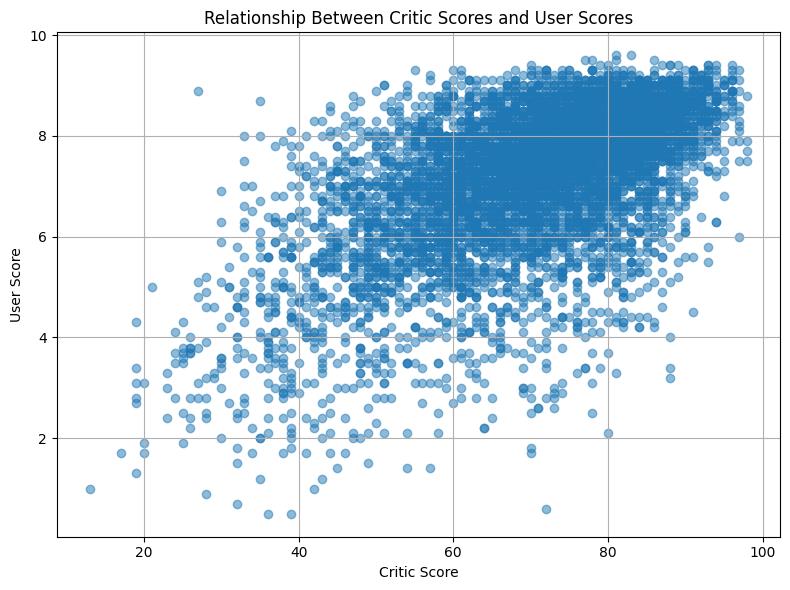

Correlation between Critic Score and User Score: 0.5805539775717881


In [7]:
# 1. Calculate the correlation between Critic_Score and User_Score
correlation = ratings_data['Critic_Score'].corr(ratings_data['User_Score'])

# 2. Visualize the relationship between Critic_Score and User_Score using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(ratings_data['Critic_Score'], ratings_data['User_Score'], alpha=0.5)
plt.title('Relationship Between Critic Scores and User Scores')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Output the correlation coefficient
print("Correlation between Critic Score and User Score:", correlation)

</br>
The correlation coefficient of approximately 0.581 suggests a moderate positive relationship between scores given by professional critics and users. While higher critic scores generally correspond to higher user scores, other factors may influence user ratings independently of critic assessments. Discrepancies between critic and user scores may arise due to varying evaluation criteria and individual gaming experiences.
</br></br>

### Q7
**Is there a relationship between scores from professional critics and total sales per game title? Do higher/lower scores translate to higher/lower sales?** 
</br></br>

### Q8
**Write a conclusion outlining your analysis and results.** 
</br></br>